In [16]:
import numpy as np
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [79]:
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout

input_size = x_train.shape[1]*x_train.shape[2]

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1024, input_dim=input_size, activation= 'tanh'))
model.add(Dense(60, activation= 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

In [80]:
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [81]:
from keras.callbacks import EarlyStopping
callback_es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

batch_size = 32 
epochs = 100

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[callback_es])

Epoch 1/100
1688/1688 [==============================] - 35s 20ms/step - loss: 0.3504 - accuracy: 0.8950 - val_loss: 0.1725 - val_accuracy: 0.9503
Epoch 2/100
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2289 - accuracy: 0.9319 - val_loss: 0.1256 - val_accuracy: 0.9668
Epoch 3/100
1688/1688 [==============================] - 32s 19ms/step - loss: 0.1759 - accuracy: 0.9485 - val_loss: 0.1110 - val_accuracy: 0.9682
Epoch 4/100
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 5/100
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1271 - accuracy: 0.9621 - val_loss: 0.0936 - val_accuracy: 0.9737
Epoch 6/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1104 - accuracy: 0.9671 - val_loss: 0.0897 - val_accuracy: 0.9748
Epoch 7/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0964 - accuracy: 0.9713 - val_loss: 0

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08058762550354004
Test accuracy: 0.9758999943733215


<a href="https://colab.research.google.com/github/Tiagoeem/visao_2022_batalha_das_redes/blob/main/batalha_das_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração



In [1]:
# Grupos
grupos = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']
seu_grupo = 'G3' # substitua o x pelo número do seu grupo

In [88]:
from pathlib import Path

url = 'https://drive.google.com/drive/u/0/folders/1Y0d_Cw4ypyO69LLM1H3AzW0nQfV-BZ3M'
import gdown
gdown.download_folder(url, quiet=True)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1QPiMbWgFa5M4-t2yj-CvCT445RoemFe_ 



In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

raiz_desafio = Path('/content/Desafios/')
dict_desafios = {}
for dir in raiz_desafio.iterdir():
    nome_grupo = str(dir).split('_')[2]
    dict_desafios[nome_grupo] = {}
    for arq in dir.iterdir():
        digito = str(arq).split('.')[0][-1]
        dict_desafios[nome_grupo][digito] = {}
        dict_desafios[nome_grupo][digito]['true'] = int(digito)
        dict_desafios[nome_grupo][digito]['file'] = arq
        im = cv.imread(str(arq.resolve()))
        b,g,r = cv.split(im)
        p = np.array(b).astype('float32')
        dict_desafios[nome_grupo][digito]['imagem'] = p / 255
        dict_desafios[nome_grupo][digito]['predito'] = 0

## Exemplo de uso

In [4]:
dict_desafios['G3']['3']['imagem']

array([[0.00392157, 0.        , 0.00392157, 0.00392157, 0.        ,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.        , 0.0039

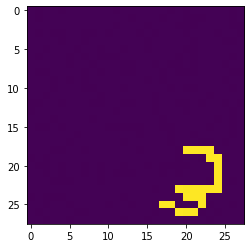

In [5]:
plt.imshow(dict_desafios['G3']['3']['imagem'])
plt.show()

In [25]:
dict_desafios

{'G2': {},
 'Tiago': {'5': {'true': 5,
   'file': PosixPath('/content/Desafios/criado_por_Tiago/des_Tiago_5.bmp'),
   'imagem': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [84]:
# predicao = model.predict( np.array([ dict_desafios['G3']['3']['imagem'] ]) )
# predicao = 3 # -> apenas um exemplo
# predicao

for i in dict_desafios.keys():
  for j in dict_desafios[i].keys():
    predicted = model.predict(np.array([dict_desafios[i][j]['imagem']]))
    dict_desafios[i][j]['predito'] = np.argmax(predicted)
    print(dict_desafios[i][j]['true'],dict_desafios[i][j]['predito'])


5 5
2 7
1 5
2 2
5 8
4 2
1 3
6 4
3 2
7 3
3 2
2 2
6 7
7 2
3 7
8 8
2 2
4 5
1 1
6 5
3 3
9 6


In [10]:
# armazenar predição
dict_desafios['G3']['3']['predito'] = predicao

# Desempenho

Utilize a função verificacao_desempenho

In [66]:
def verificacao_desempenho(dict_desafio):
    pontuacoes = {} 
    pontuacoes['acertos_totais'] = 0
    pontuacoes['total'] = 0
    pontuacoes['%'] = 0
    for grupo in dict_desafio:
        pontuacoes[grupo] = {}
        pontuacoes[grupo]['acertos'] = 0
        pontuacoes[grupo]['total'] = 0
        pontuacoes[grupo]['%'] = 0
        for digito in dict_desafio[grupo]:
            pontuacoes['total'] += 1
            pontuacoes[grupo]['total'] += 1
          

            if dict_desafio[grupo][digito]['predito'] == dict_desafio[grupo][digito]['true']:
                pontuacoes[grupo]['acertos'] += 1
                pontuacoes['acertos_totais'] += 1

            pontuacoes[grupo]['%'] = pontuacoes[grupo]['acertos'] / pontuacoes[grupo]['total']

            pontuacoes['%'] = pontuacoes['acertos_totais'] / pontuacoes['total']

    return pontuacoes
                

In [85]:
verificacao_desempenho(dict_desafios)

{'acertos_totais': 7,
 'total': 22,
 '%': 0.3181818181818182,
 'G2': {'acertos': 0, 'total': 0, '%': 0},
 'Tiago': {'acertos': 1, 'total': 3, '%': 0.3333333333333333},
 'G3': {'acertos': 1, 'total': 6, '%': 0.16666666666666666},
 'G1': {'acertos': 0, 'total': 0, '%': 0},
 'G4': {'acertos': 0, 'total': 2, '%': 0.0},
 'G5': {'acertos': 1, 'total': 4, '%': 0.25},
 'G6': {'acertos': 4, 'total': 7, '%': 0.5714285714285714}}